# What are the most demanded skills for the top 3 most popular data roles?

## Methodology
1- Clean-up skill column

2- Calculate skill count based on job_title_short

3- Calculate skill percentage

4- Plot final findings

## Import Libraries and Data

In [11]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter Data for the USA and top 3 data roles (Data Analyst, Data Engineer and Data Scientist)

In [12]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_USA = df[(df['job_country'] == 'United States')&(df['job_title_short'].isin(job_titles))]

## Explode Skills
expands the lists so each skill appears in its own row, allowing us to analyze the distribution of skills

In [13]:
df_skills = df_USA.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
3,Data Engineer,aws
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


## Count Skills per Job Title
Groups DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it into a DataFrame 

In [14]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as skill_count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
436,python,Data Scientist,42379
538,sql,Data Analyst,34452
540,sql,Data Scientist,30034
167,excel,Data Analyst,27519
448,r,Data Scientist,26022
...,...,...,...
312,mattermost,Data Scientist,1
82,clickup,Data Scientist,1
510,shogun,Data Scientist,1
75,chainer,Data Analyst,1


## Convert Counts to Percentages

In [15]:
df_job_title_count = df_USA['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080


### Calculate the percentages. 

* First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column . 

* Then calculate the percentage of each skill

In [16]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
662,mattermost,Data Scientist,1,58830,0.001700
663,clickup,Data Scientist,1,58830,0.001700
664,shogun,Data Scientist,1,58830,0.001700
665,chainer,Data Analyst,1,67816,0.001475


## Plot Percentage Count

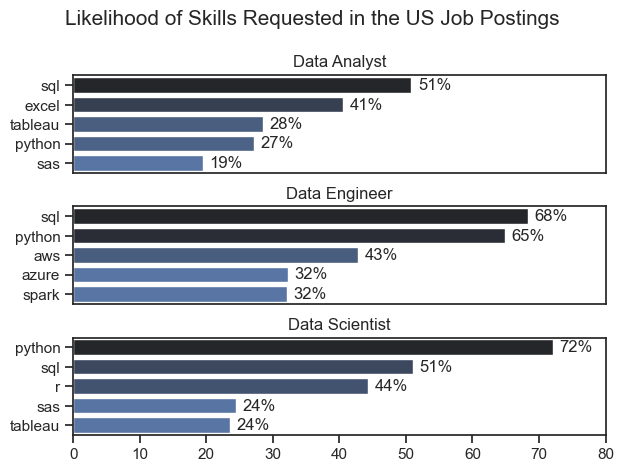

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,80)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in the US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()